# LOAN APPLICATION STATUS PREDICTION

Submitted by:Sucharitha A M
             1829 batch

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining the Data

In [2]:
df=pd.read_csv("Loanapplication.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df = df.drop(columns=['Loan_ID'])
categorical_columns=['Gender','Married','Depedents','Education','Self_Employed','Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)
numerical_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Depedents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


Here separating the categorical and numerical columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [5]:
df.shape

(614, 12)

Dataset contains 614 rows and 12 columns

In [6]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Dataset contains 12 columns

In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Dataset contains sum of null values

# Summary Statistics

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1 The mean is more than median 50% percentile in all columns.

2 There is a large difference in 75% percentile.

3 The 1 and 2 observation suggest that there are extreme outliers present in these three columns.

In [10]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

Target/dependent variables is discrete and categorial in nature

In [11]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Loan_Status as some two values in the categories like Y and N

# Data Visualizations

<AxesSubplot:xlabel='Gender', ylabel='count'>

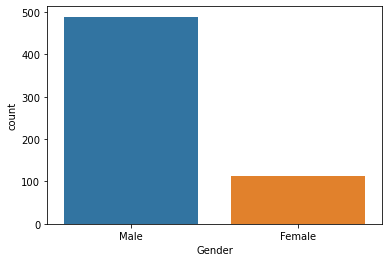

In [12]:
sns.countplot(df['Gender'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Married', ylabel='count'>

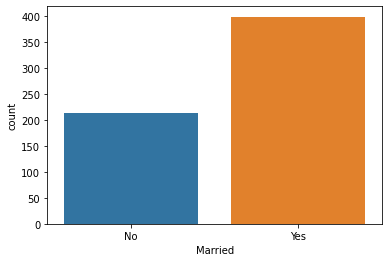

In [13]:
sns.countplot(df['Married'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

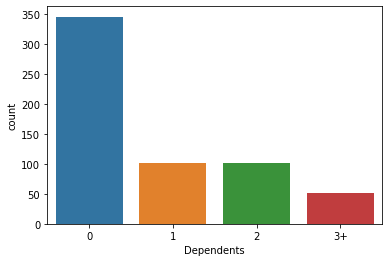

In [14]:
sns.countplot(df['Dependents'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Education', ylabel='count'>

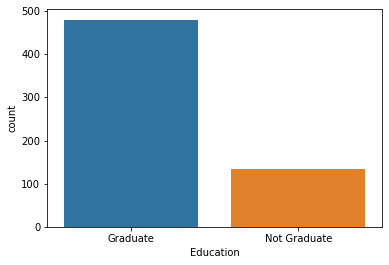

In [15]:
sns.countplot(df['Education'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

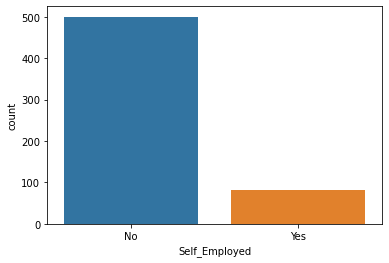

In [16]:
sns.countplot(df['Self_Employed'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

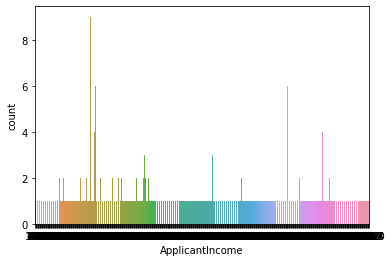

In [17]:
sns.countplot(df['ApplicantIncome'])

Here Data in not normally distributed in the all columns.

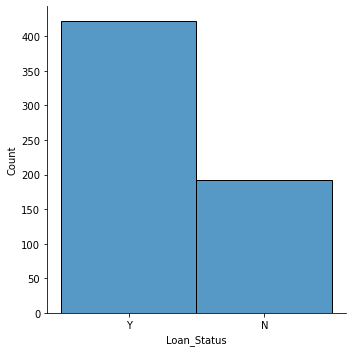

In [18]:
sns.displot(df['Loan_Status'])

Here Data in not normally distributed in the all columns beacuse of viscuse problem.

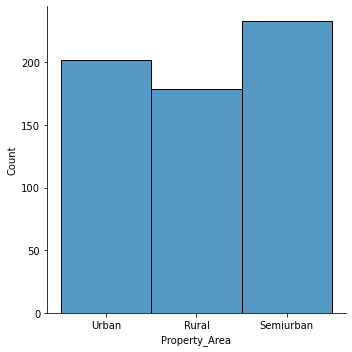

In [19]:
sns.displot(df['Property_Area'])

Here Data in not normally distributed in the all columns beacuse of viscuse problem.

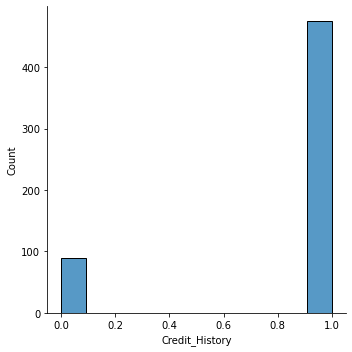

In [20]:
sns.displot(df['Credit_History'])

Here Data in not normally distributed in the all columns beacuse of viscuse problem.

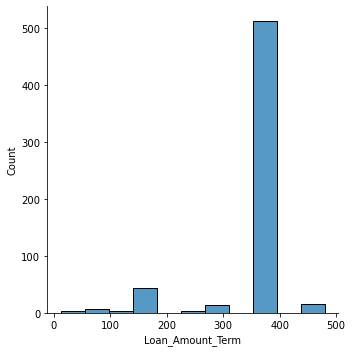

In [21]:
sns.displot(df['Loan_Amount_Term'])

Here Data in not normally distributed in the all columns beacuse of viscuse problem.

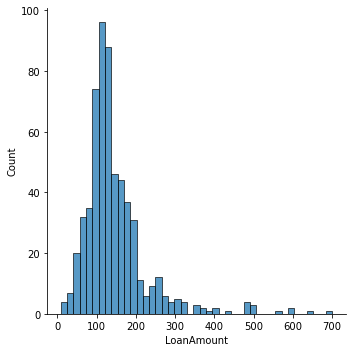

In [22]:
sns.displot(df['LoanAmount'])

Here Data in not normally distributed in the all columns beacuse of viscuse problem.

<AxesSubplot:>

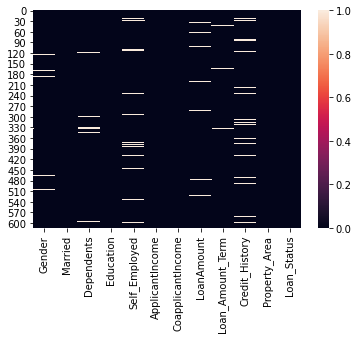

In [23]:
sns.heatmap(df.isnull())

Here heatmap contains all the nullvalues of the dataset.

In [24]:
dfcor=df.corr()
dfcor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

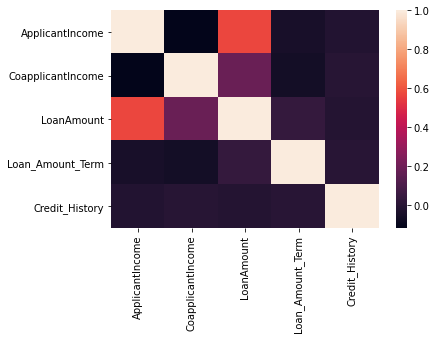

In [25]:
sns.heatmap(dfcor)

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

<AxesSubplot:>

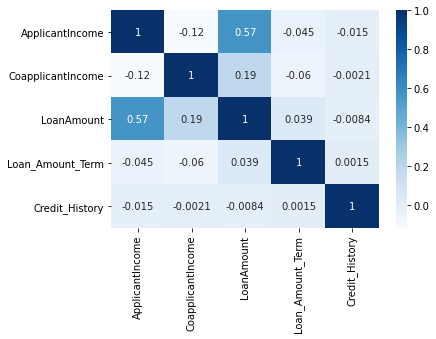

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

 Dark shades are higly correlated

<AxesSubplot:>

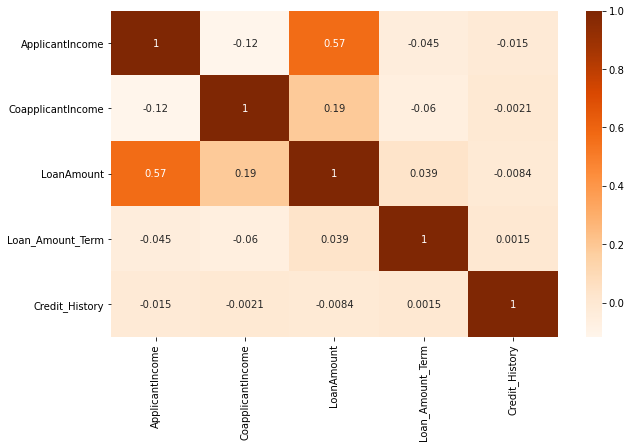

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

Light shades are higly correlated

Credit_Histroy is higly correlated with Loan_Amount_Term

Loan_Amount_Term is highly negatively correlated with Loan_Amount 

Loan_Amount is higly positively correlated with  ApplicationIncome

ApplicationIncome is negatively correlated with Credit_Hostory


# Plotting Outliers

In [28]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

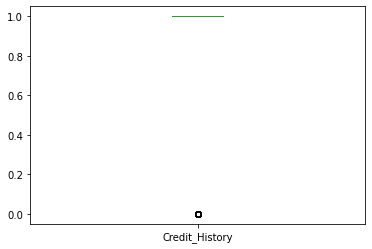

In [29]:
df['Credit_History'].plot.box()

Here credit_History have  outside the viscous so we can find here outliers easily.

<AxesSubplot:>

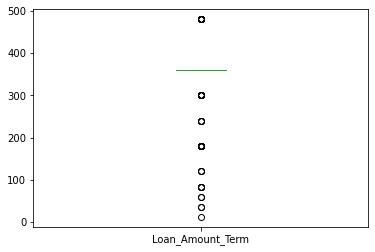

In [30]:
df['Loan_Amount_Term'].plot.box()

Here Loan_Amount_Term have  outside the viscous so we can find here outliers easily.

<AxesSubplot:>

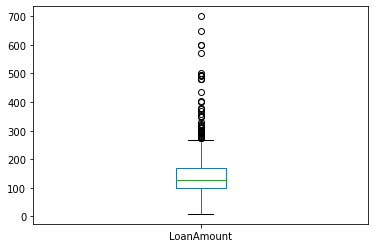

In [31]:
df['LoanAmount'].plot.box()

Here LoanAmount have  outside the viscous so we can find here outliers easily.

<AxesSubplot:>

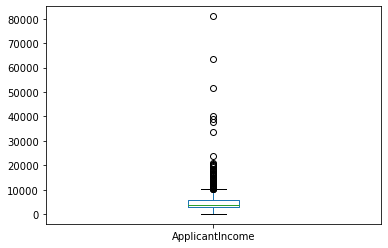

In [32]:
df['ApplicantIncome'].plot.box()

Here ApplicationIncome have  outside the viscous so we can find here outliers easily.

<AxesSubplot:>

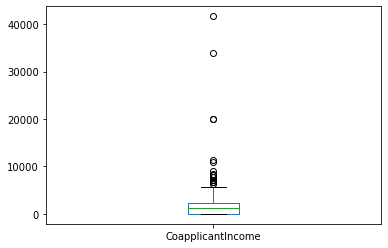

In [33]:
df['CoapplicantIncome'].plot.box()

Here coapplicantincome have  outside the viscous so we can find here outliers easily.

In [34]:
df.shape

(614, 12)

Dataset contains 614 rows and 12 columns

# To Check Distribution of Skewness

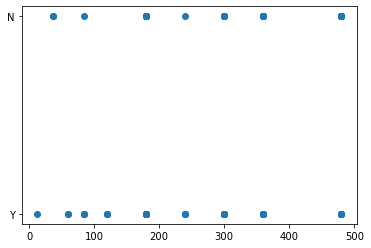

In [35]:
plt.scatter(df['Loan_Amount_Term'],df['Loan_Status'])

Here sactter the values of Loan_Amount_Term and Loan_Status

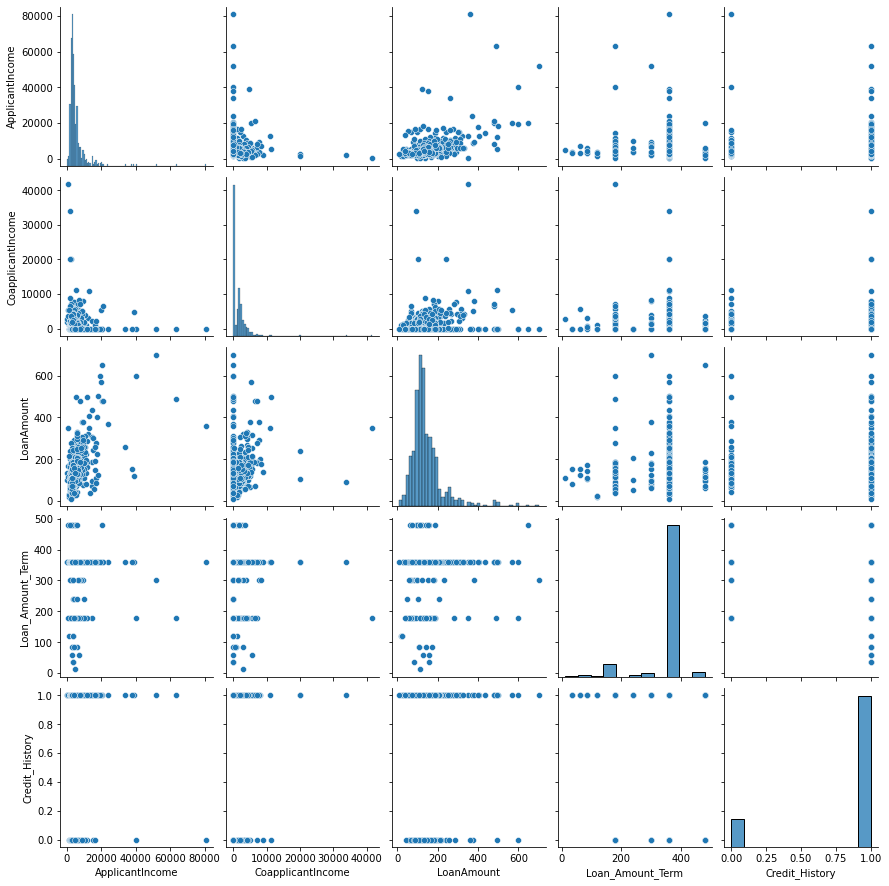

In [36]:
sns.pairplot(df)

Remove the missing values.

drop  the nagativitycorrelated columns.

remove the outliers.

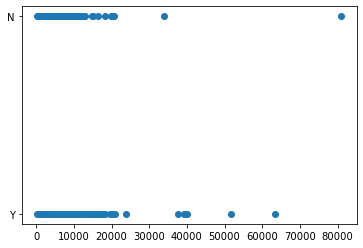

In [37]:
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])
plt.show()

Here scattering the plot of ApplicantIncome and Loan_Status

In [38]:
df.drop('ApplicantIncome',axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
df.shape

(614, 11)

Dataset contains 614 rows and 11 columns

In [40]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Dataset contains 11 columns

# Encoding Method

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
df_encoded=pd.get_dummies(df,drop_first=True)
df_encoded.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


# Missing Value Handling Method

In [43]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here Dataset contains the null sum values

In [44]:
for col in df.columns:
    missing_series=df[col][df[col].isna()==True]
    if missing_series.size>0:
        print(col,missing_series.size)
        plt.show()

Gender 13
Married 3
Dependents 15
Self_Employed 32
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50


In [45]:
categ_cols=['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History','Loan_Status']
for col in categ_cols:
    df[col]=df[col].fillna(df[col].mode()[0])
    df[col]=df[col].fillna(df[col].mode()[0])

In [46]:
dummy_cols=['Gender','Married','Dependents','Self_Employed','Education','Credit_History','Property_Area']
train_dummies=pd.get_dummies(df[dummy_cols],drop_first=True)
test_dummies=pd.get_dummies(df[dummy_cols],drop_first=True)

In [47]:
num_cols=['CoapplicantIncome','Loan_Amount_Term','LoanAmount']
df_train_num=(df[num_cols]-df[num_cols].mean())/df[num_cols].std()
df_test_num=(df[num_cols]-df[num_cols].mean())/df[num_cols].std()

In [48]:
Loan_Status=df.Loan_Status.apply(lambda x:0 if x=='N' else 1)
df=pd.concat([df,train_dummies,Loan_Status],axis=1)
df=pd.concat([df,test_dummies],axis=1)

In [49]:
df_drop=df.dropna()
df_fill_median=df.fillna(df.median())
df_drop=df.dropna()
df_fill_median=df.fillna(df.median())
df_fill_median.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,0.0,NaN,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1
1,Male,Yes,1,Graduate,No,1508.0,128.0,360.0,1.0,Rural,...,1.0,1,1,1,0,0,0,0,0,0
2,Male,Yes,0,Graduate,Yes,0.0,66.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,1,0,0,1
3,Male,Yes,0,Not Graduate,No,2358.0,120.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,0,1,0,1
4,Male,No,0,Graduate,No,0.0,141.0,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1


# Label Encoding Method

In [50]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Gender']=LE.fit_transform(df['Gender'])


In [51]:
df.Gender.unique()

array([1, 0])

In [52]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,No,0,Graduate,No,0.0,NaN,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1
1,1,Yes,1,Graduate,No,1508.0,128.0,360.0,1.0,Rural,...,1.0,1,1,1,0,0,0,0,0,0
2,1,Yes,0,Graduate,Yes,0.0,66.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,1,0,0,1
3,1,Yes,0,Not Graduate,No,2358.0,120.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,0,1,0,1
4,1,No,0,Graduate,No,0.0,141.0,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1


In [53]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Married']=LE.fit_transform(df['Married'])


In [54]:
df.Married.unique()

array([0, 1])

In [55]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,Graduate,No,0.0,NaN,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,Graduate,No,1508.0,128.0,360.0,1.0,Rural,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,Graduate,Yes,0.0,66.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,Not Graduate,No,2358.0,120.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,Graduate,No,0.0,141.0,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1


In [56]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Education']=LE.fit_transform(df['Education'])


In [57]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Loan_Status']=df['Loan_Status'].replace({'N':0,'Y':1})


In [58]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,No,0.0,NaN,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,No,1508.0,128.0,360.0,1.0,Rural,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,0,Yes,0.0,66.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,1,No,2358.0,120.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,0,No,0.0,141.0,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1


In [59]:
df.Education.unique()

array([0, 1])

In [60]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,No,0.0,NaN,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,No,1508.0,128.0,360.0,1.0,Rural,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,0,Yes,0.0,66.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,1,No,2358.0,120.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,0,No,0.0,141.0,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1


In [61]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])
df['LoanAmount']=LE.fit_transform(df['LoanAmount'])
df['Property_Area']=LE.fit_transform(df['Property_Area'])



In [62]:
df.Self_Employed.unique()

array([0, 1])

In [63]:
df.LoanAmount.unique()

array([224,  81,  26,  73,  94, 168,  48, 110, 119, 185,  28,  62, 139,
        67,   1,  78,  53,  34,  86,  68,  57, 181,  69,  65, 103, 135,
        75,  63,   5, 140,  32,  59, 182, 222,  97, 129,  36,  12,  33,
        87,  49,  43,   9, 172,  50,  88, 126,  52, 116, 217, 164,  79,
       180,  89, 121,  37, 132,  66, 124,  83,  64, 212, 118, 167,  14,
       145, 123,  84, 133,   2, 209,  90, 206, 220, 112, 150, 148,  47,
        92, 104, 210,  71, 130, 106,  40, 165, 137,  46, 188, 211, 128,
       201,  55, 173,  39, 157,  82,   4, 159, 200, 163,  51, 169,  74,
        24, 202,  42,  54, 196,  27,  31, 166,  61,  19,  13, 115, 120,
        38,  45, 117, 219,  77,  17,  20,  80, 147, 156,  30,  21,  91,
         8, 171,  93, 107,  76, 170, 136, 177, 184, 102, 142, 193,  35,
        16, 223,  44,  96,  58,  85, 203, 194,  18, 111, 204, 176, 189,
        70,  29, 195, 216, 122,  11, 151, 178, 154, 199, 190, 175, 108,
       207,  56,  10,  25,  15, 187,  23, 149, 125, 155, 192, 22

In [64]:
df.Property_Area.unique()

array([2, 0, 1])

In [65]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.0,224,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,1508.0,81,360.0,1.0,0,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,0,1,0.0,26,360.0,1.0,2,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,1,0,2358.0,73,360.0,1.0,2,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,0,0,0.0,94,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1


In [66]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Dependents']=LE.fit_transform(df['Dependents'])


In [67]:
df.Dependents.unique()

array([0, 1, 2, 3])

In [68]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.0,224,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,1508.0,81,360.0,1.0,0,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,0,1,0.0,26,360.0,1.0,2,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,1,0,2358.0,73,360.0,1.0,2,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,0,0,0.0,94,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1


# Missing Value Handling Method

In [69]:
df.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status                0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Self_Employed_Yes          0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status                0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Self_Employed_Yes          0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [70]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mean())
df["Married"]=df["Married"].fillna(df["Married"].median())

# Checking Skewness

In [71]:
df.skew()

Gender                    -1.648795
Married                   -0.644850
Dependents                 1.015551
Education                  1.367622
Self_Employed              2.159796
CoapplicantIncome          7.491531
LoanAmount                 0.626530
Loan_Amount_Term          -2.402112
Credit_History            -2.021971
Property_Area             -0.066196
Loan_Status               -0.809998
Credit_History            -2.021971
Gender_Male               -1.648795
Married_Yes               -0.644850
Dependents_1               1.798506
Dependents_2               1.814433
Dependents_3+              3.028961
Self_Employed_Yes          2.159796
Education_Not Graduate     1.367622
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
Loan_Status               -0.809998
Credit_History            -2.021971
Gender_Male               -1.648795
Married_Yes               -0.644850
Dependents_1               1.798506
Dependents_2               1.814433
Dependents_3+              3

Dataset of Skewness values

# Outliers Removal Method

In [72]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.52836225, 0.7820157 ,
        1.42814704],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.52836225, 0.7820157 ,
        0.70020801],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.52836225, 0.7820157 ,
        1.42814704],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.52836225, 0.7820157 ,
        1.42814704],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.52836225, 0.7820157 ,
        1.42814704],
       [2.11710719, 1.37208932, 0.73780632, ..., 0.52836225, 1.2787467 ,
        0.70020801]])

removing the outliers of df

In [73]:
z_scores = zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

new_df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.0,224,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,1508.0,81,360.0,1.0,0,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,0,1,0.0,26,360.0,1.0,2,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,1,0,2358.0,73,360.0,1.0,2,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,0,0,0.0,94,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1


In [74]:
df.shape

(614, 32)

Dataset contains 614 rows and 32 columns

In [75]:
new_df.shape

(548, 32)

Here new dataset contains 548 rows and 32 columns

# Standard Scaler Method

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [77]:
scaledX

array([[ 0.47234264, -1.37208932, -0.73780632, ..., -0.52836225,
        -0.7820157 ,  1.42814704],
       [ 0.47234264,  0.72881553,  0.25346957, ..., -0.52836225,
        -0.7820157 , -0.70020801],
       [ 0.47234264,  0.72881553, -0.73780632, ..., -0.52836225,
        -0.7820157 ,  1.42814704],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ..., -0.52836225,
        -0.7820157 ,  1.42814704],
       [ 0.47234264,  0.72881553,  1.24474546, ..., -0.52836225,
        -0.7820157 ,  1.42814704],
       [-2.11710719, -1.37208932, -0.73780632, ..., -0.52836225,
         1.2787467 , -0.70020801]])

Here Standardscaler values of ScaledX

In [78]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [79]:
Y.explained_variance_ratio_

array([1.47389102e-01, 1.27945615e-01, 1.09806100e-01, 9.67201540e-02,
       9.07764631e-02, 7.55988560e-02, 7.21961228e-02, 6.87130547e-02,
       4.69801922e-02, 4.53072572e-02, 3.58053207e-02, 3.08847969e-02,
       2.84286436e-02, 2.34483208e-02, 6.99939366e-31, 2.21162024e-31,
       1.02473702e-31, 7.02739407e-32, 3.73337328e-32, 9.54826632e-33,
       8.43450269e-33, 6.31935468e-33, 2.91555745e-33, 2.21420293e-33,
       1.30877670e-33, 8.93492897e-34, 8.93492897e-34, 8.93492897e-34,
       8.93492897e-34, 8.93492897e-34, 8.93492897e-34, 8.67293783e-36])

In [80]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 14.73891025,  27.53347177,  38.51408181,  48.18609721,
        57.26374352,  64.82362912,  72.0432414 ,  78.91454687,
        83.61256609,  88.1432918 ,  91.72382387,  94.81230357,
        97.65516792, 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ])

In [81]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 13


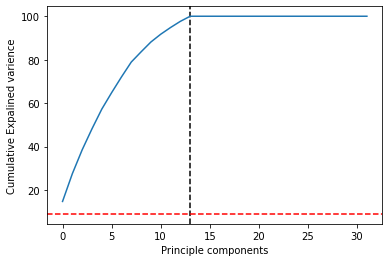

In [82]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Here yplot is cumaltive explained varience and xplot is principle components

# Model Building

In [83]:
x_train=df.drop("Gender",axis=1)
y_train=df.Gender

In [84]:
x_train.head()

,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,0,0.0,224,360.0,1.0,2,1,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,0,0,1508.0,81,360.0,1.0,0,0,...,1.0,1,1,1,0,0,0,0,0,0
2,1,0,0,1,0.0,26,360.0,1.0,2,1,...,1.0,1,1,0,0,0,1,0,0,1
3,1,0,1,0,2358.0,73,360.0,1.0,2,1,...,1.0,1,1,0,0,0,0,1,0,1
4,0,0,0,0,0.0,94,360.0,1.0,2,1,...,1.0,1,0,0,0,0,0,0,0,1


Here x_train contains 5 rows and 31 columns

In [85]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

Here y_train contains  name Gender 

In [86]:
x_train.shape

(614, 31)

Here x_train contains 614 rows and 31 columns

In [87]:
y_train.shape

(614,)

Here y_train contains 614 rows and zero columns

In [88]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.0,224,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,1508.0,81,360.0,1.0,0,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,0,1,0.0,26,360.0,1.0,2,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,1,0,2358.0,73,360.0,1.0,2,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,0,0,0.0,94,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1


# Classification Methods

In [89]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [90]:
x= df.drop(['Loan_Status'],axis=1)
y=df["Loan_Status"]
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [91]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state", i)

71.92118226600985 at random_state 0
67.98029556650246 at random_state 1
70.44334975369459 at random_state 2
69.95073891625616 at random_state 3
69.45812807881774 at random_state 4
71.42857142857143 at random_state 5
73.89162561576354 at random_state 6
74.8768472906404 at random_state 7
73.39901477832512 at random_state 8
68.96551724137932 at random_state 9
66.50246305418719 at random_state 10
72.41379310344827 at random_state 11
66.99507389162561 at random_state 12
69.95073891625616 at random_state 13
66.99507389162561 at random_state 14
67.98029556650246 at random_state 15
71.92118226600985 at random_state 16
69.95073891625616 at random_state 17
71.92118226600985 at random_state 18
66.99507389162561 at random_state 19
67.48768472906403 at random_state 20
73.89162561576354 at random_state 21
68.4729064039409 at random_state 22
71.92118226600985 at random_state 23
66.50246305418719 at random_state 24
69.95073891625616 at random_state 25
70.93596059113301 at random_state 26
66.9950738916

In [92]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=0)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best accuracy is",maxAccu," on Random_state",maxRS)        


Best accuracy is 0.772972972972973  on Random_state 1


In [93]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.85      0.78      0.82       134
           1       0.85      0.78      0.82       134

   micro avg       0.85      0.78      0.82       268
   macro avg       0.85      0.78      0.82       268
weighted avg       0.85      0.78      0.82       268
 samples avg       0.57      0.57      0.57       268

Test Accuracy:74.59%


The Test Accuracy of DecisionTreeClassifier is 74.59%

In [94]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
                                best_score = knn.score(x_train, y_train)
                                best_Kvalue = i
    print("Best KNN Value:{}".format(best_Kvalue )) 
    print("Test Accuarcy:{}".format(round(best_score*100,2)))

Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0


In [95]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(" KNN Classifier: \n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy:{}%".format(round(knn.score(x_test,y_test)*100,2)))

 KNN Classifier: 

               precision    recall  f1-score   support

           0       0.72      0.88      0.79       134
           1       0.72      0.88      0.79       134

   micro avg       0.72      0.88      0.79       268
   macro avg       0.72      0.88      0.79       268
weighted avg       0.72      0.88      0.79       268
 samples avg       0.64      0.64      0.64       268

Test Accuracy:67.03%


The Test Accuracy od KNNClassifier is 67.03%

In [96]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.82      0.88      0.85       134
           1       0.82      0.88      0.85       134

   micro avg       0.82      0.88      0.85       268
   macro avg       0.82      0.88      0.85       268
weighted avg       0.82      0.88      0.85       268
 samples avg       0.64      0.64      0.64       268

Test Accuracy:77.3%


The Test Accuracy of RandomForestClassifier is 76.76%

# Cross Value Correction Method

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7035052645608423


In [99]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.6743169398907105


In [100]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.7524456883913102


# Hyperparameter Tunning

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = {
    'max_depth':[6,7,8],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion' :['gini','entropy']
}

In [103]:
rf = RandomForestClassifier()

In [104]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)

In [105]:
rf_cv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

# AUC ROC Curve

In [106]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [107]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)
y_pred_prob

[array([[0.2 , 0.8 ],
        [0.  , 1.  ],
        [0.22, 0.78],
        [0.13, 0.87],
        [0.  , 1.  ],
        [0.91, 0.09],
        [0.02, 0.98],
        [0.78, 0.22],
        [0.83, 0.17],
        [0.01, 0.99],
        [0.02, 0.98],
        [0.12, 0.88],
        [0.27, 0.73],
        [0.02, 0.98],
        [0.  , 1.  ],
        [0.06, 0.94],
        [0.36, 0.64],
        [0.03, 0.97],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.97, 0.03],
        [0.03, 0.97],
        [0.05, 0.95],
        [0.28, 0.72],
        [0.45, 0.55],
        [0.4 , 0.6 ],
        [0.42, 0.58],
        [0.08, 0.92],
        [0.77, 0.23],
        [0.99, 0.01],
        [0.14, 0.86],
        [0.55, 0.45],
        [0.06, 0.94],
        [0.66, 0.34],
        [0.61, 0.39],
        [0.77, 0.23],
        [0.05, 0.95],
        [0.03, 0.97],
        [0.01, 0.99],
        [0.01, 0.99],
        [0.17, 0.83],
        [0.82, 0.18],
        [0.03, 0.97],
        [0.29, 0.71],
        [0.05, 0.95],
        [0

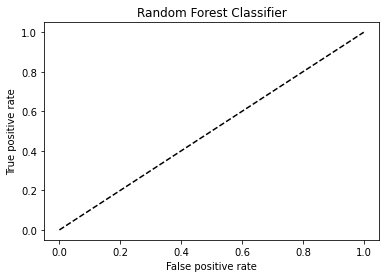

In [108]:
plt.plot([0,1],[0,1],'k--')
plt.plot(label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()


Here the randomforestclassifier plot contains xlabel is false positive rate and y label is true positive rate.

# Evalute the Final Model

In [109]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

77.29729729729729


# Saving The Model

In [110]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Here Saving the final model FinalModle.pkl

# Predicition Method

In [111]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
preds = rf.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]
[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]


The train and test data is balanced most classification methods hit the 77% accuracy with the datset.